GROUP:2 

MEMBER:
   - Janice Mamani

In [1]:
import numpy as np
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import sys
sys.path.insert(0, r'C:\Users\USUARIO\Documents\GitHub\hdmpy')
import hdmpy
import networkx as nx

## 1. Multicollinearity

**Multicollinearity** refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. This presents a problem because it undermines the statistical significance of an independent variable. Other consequences include highly variable least-squares estimates, which can be unstable and difficult to interpret. Moreover, this issue is typically divided into two categories:

- *Perfect Multicollinearity*: This arises when the matrix (X'X) is not invertible due to a lack of full rank. It occurs when at least one regressor is a linear combination of others, rendering the matrix singular and thus non-invertible.

- *Imperfect Multicollinearity*: This situation emerges when there is a strong, yet not perfectly linear, correlation between regressors. While Ordinary Least Squares (OLS) estimation is still feasible, the variance of the estimated coefficients increases with the degree of correlation. This increase in variance leads to lower t-statistics, increasing the likelihood of failing to reject the null hypothesis H0, even when the variable might be significant.

### Examples and Implications

1. *Example in Housing Prices*: Consider predicting housing prices based on features like the number of rooms, the size of the house (in square feet), and the number of bedrooms. Often, the number of rooms and the number of bedrooms are correlated because a larger number of rooms generally includes more bedrooms. This correlation can dilute the effect each variable has on the model because it is hard to distinguish their individual contributions to house prices.

2. *Example in Employee Data*: Predicting an employee's salary based on their years of education and years of experience. Typically, higher education might correlate with more years of experience, especially in certain fields. This can lead to multicollinearity issues when both are used as predictors for salary.

### Mathematical Representation

Let's denote the independent variables as $ X_1, X_2, \ldots, X_p $. The regression model can be expressed as:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon
$$

where $ \epsilon $ is the error term. Multicollinearity arises when:

$$
X_j = \alpha_0 + \alpha_1 X_1 + \ldots + \alpha_{j-1} X_{j-1} + \alpha_{j+1} X_{j+1} + \ldots + \alpha_p X_p + \nu
$$

for some variable $ X_j $ being linearly predicted by other independent variables in the model, where $ \nu $ is a small error term.

### Consequences

- *Estimate Variance*: The variance of the estimated coefficients becomes large. This leads to wide confidence intervals and a less precise estimate of the effect size.
- *Coefficient Significance*: Statistical tests for the significance of coefficients might fail to detect true significant relationships due to increased standard errors.

## Matrix Generation and Inversion in Python

Here's how you can generate the matrix in Python and try to find its inverse.

In [2]:
# Set a seed for reproducibility
np.random.seed(0)

# Generate a 10x9 matrix with normally distributed values
A = np.random.normal(0, 1, (10, 9))
A_df = pd.DataFrame(A)
A_df

,0,1,2,3,4,5,6,7,8
0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357,-0.103219
1,0.410599,0.144044,1.454274,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158
2,0.313068,-0.854096,-2.552990,0.653619,0.864436,-0.742165,2.269755,-1.454366,0.045759
3,-0.187184,1.532779,1.469359,0.154947,0.378163,-0.887786,-1.980796,-0.347912,0.156349
4,1.230291,1.202380,-0.387327,-0.302303,-1.048553,-1.420018,-1.706270,1.950775,-0.509652
5,-0.438074,-1.252795,0.777490,-1.613898,-0.212740,-0.895467,0.386902,-0.510805,-1.180632
6,-0.028182,0.428332,0.066517,0.302472,-0.634322,-0.362741,-0.672460,-0.359553,-0.813146
7,-1.726283,0.177426,-0.401781,-1.630198,0.462782,-0.907298,0.051945,0.729091,0.128983
8,1.139401,-1.234826,0.402342,-0.684810,-0.870797,-0.578850,-0.311553,0.056165,-1.165150
9,0.900826,0.465662,-1.536244,1.488252,1.895889,1.178780,-0.179925,-1.070753,1.054452


In [3]:

# Create the 10th vector as a linear combination of three vectors
linear_combination = A[:, 0] + 2 * A[:, 2] + 3 * A[:, 4]

# Combine into a full matrix
full_matrix = np.column_stack((A, linear_combination))
full_matrix_df = pd.DataFrame(full_matrix)
det = np.linalg.det(full_matrix)
round_det = np.round(det)
# print round matrix

print("det:",det)
print("rounded det:", round_det) #The determinant is a very small number, almost zero.

det: 4.016955071315734e-15
rounded det: 0.0


In [4]:
full_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357,-0.103219,9.324202
1,0.410599,0.144044,1.454274,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158,3.684171
2,0.313068,-0.854096,-2.552990,0.653619,0.864436,-0.742165,2.269755,-1.454366,0.045759,-2.199603
3,-0.187184,1.532779,1.469359,0.154947,0.378163,-0.887786,-1.980796,-0.347912,0.156349,3.886021
4,1.230291,1.202380,-0.387327,-0.302303,-1.048553,-1.420018,-1.706270,1.950775,-0.509652,-2.690022
5,-0.438074,-1.252795,0.777490,-1.613898,-0.212740,-0.895467,0.386902,-0.510805,-1.180632,0.478686
6,-0.028182,0.428332,0.066517,0.302472,-0.634322,-0.362741,-0.672460,-0.359553,-0.813146,-1.798114
7,-1.726283,0.177426,-0.401781,-1.630198,0.462782,-0.907298,0.051945,0.729091,0.128983,-1.141498
8,1.139401,-1.234826,0.402342,-0.684810,-0.870797,-0.578850,-0.311553,0.056165,-1.165150,-0.668307
9,0.900826,0.465662,-1.536244,1.488252,1.895889,1.178780,-0.179925,-1.070753,1.054452,3.516007


In [5]:

# Try to find the inverse: Since the determinant is not exactly zero, Python can still compute the inverse of the full_matrix.
try:
    inv_matrix = np.linalg.inv(full_matrix)
    inv_matrix_df = pd.DataFrame(inv_matrix)
    inv_matrix_df
except np.linalg.LinAlgError as e:
    print("Error:", str(e))
    
inv_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,-3.016427e+16,4.528678e+16,3.501227e+16,3.558851e+16,2.426691e+15,8.177690e+15,-1.355578e+16,-1.032574e+16,5.867494e+15,6.684259e+15
1,3.047155e+02,-4.875448e+02,-3.656586e+02,-3.656586e+02,-2.285366e+01,-8.125746e+01,1.371220e+02,1.066504e+02,-5.840380e+01,-7.110028e+01
2,-6.032854e+16,9.057355e+16,7.002453e+16,7.117702e+16,4.853382e+15,1.635538e+16,-2.711157e+16,-2.065147e+16,1.173499e+16,1.336852e+16
3,-2.190746e+02,3.286119e+02,2.738433e+02,2.464590e+02,1.711521e+01,6.161474e+01,-9.584515e+01,-7.530691e+01,4.449953e+01,5.134562e+01
4,-9.049281e+16,1.358603e+17,1.050368e+17,1.067655e+17,7.280073e+15,2.453307e+16,-4.066735e+16,-3.097721e+16,1.760248e+16,2.005278e+16
5,1.190543e+02,-1.788748e+02,-1.386766e+02,-1.410768e+02,-9.284394e+00,-3.140162e+01,5.365084e+01,4.026120e+01,-2.408411e+01,-2.602332e+01
6,1.831239e+02,-2.749265e+02,-2.124862e+02,-2.163715e+02,-1.418514e+01,-4.843243e+01,8.191664e+01,6.182053e+01,-3.705636e+01,-4.068393e+01
7,-1.074800e+02,1.617228e+02,1.247746e+02,1.267633e+02,8.546211e+00,2.857113e+01,-4.821742e+01,-3.625065e+01,2.146868e+01,2.382822e+01
8,-6.692645e+01,1.001515e+02,7.782196e+01,7.939300e+01,5.078283e+00,1.716497e+01,-3.098779e+01,-2.278739e+01,1.364550e+01,1.437629e+01
9,3.016427e+16,-4.528678e+16,-3.501227e+16,-3.558851e+16,-2.426691e+15,-8.177690e+15,1.355578e+16,1.032574e+16,-5.867494e+15,-6.684259e+15


We observe a discrepancy between the results from Python, Julia and R regarding matrix inversion. In R, attempting to invert a matrix results in an error. This happens because a singular matrix, which does not have an inverse, triggers an error. Conversely, Python and Julia does not produce an error when performing the same operation. This difference is due to Python's and Julia's ability to compute a least squares solution using the Moore-Penrose inverse, effectively producing a pseudo-inverse of the matrix.

Using the traditional approach, since the 10th vector in the matrix is a linear combination of the first three column vectors, the matrix lacks an inverse. This happens because the matrix A is singular. Such a condition, where perfect multicollinearity exists, means the matrix inherently cannot be inverted.

## 2. Analyzing RCT data with Precision Adjustment

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

In [6]:
## loading the data
Penn = pd.read_csv("../../GitHub/CausalAI-Course/data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]
Penn

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,NaN
1,10635,2,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,NaN
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13900,10845,0,6,6,1,0,0,1,2,0,...,0,0,0,0,0,1,0,0,1,NaN
13901,10705,2,14,14,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,NaN
13906,10558,0,9,9,0,0,0,0,2,0,...,0,0,1,0,0,0,1,0,0,NaN
13909,10677,2,4,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,NaN


In [7]:
Penn.shape

(5782, 24)

In [8]:
#this columns were not dropped out :  Unnamed: 13, recall
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durab

In [9]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T2
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
1,10635,2,7,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,NaN,1
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,1


In [10]:
Penn['dep'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

### 2.2 Histograms for treatment and control group

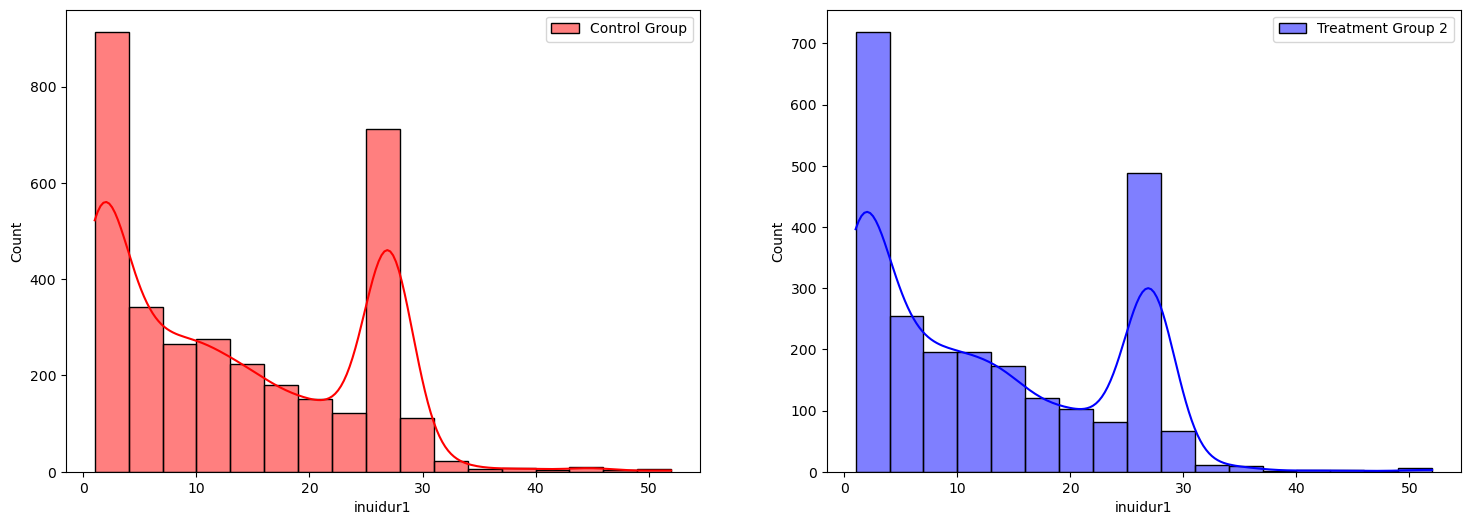

In [47]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.histplot(Penn[Penn['T2'] == 1]['inuidur1'], color='blue', label='Treatment Group 2', kde=True)
plt.legend()

plt.subplot(1,2,2)
sns.histplot(Penn[Penn['T2'] == 0]['inuidur1'], color='red', label='Control Group', kde=True)
plt.legend()
plt.show()


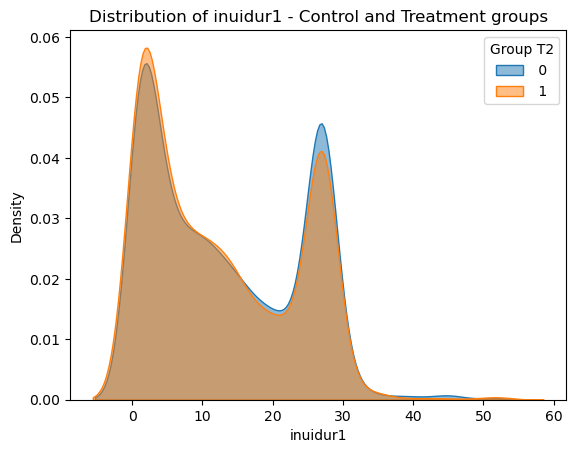

In [12]:
for label, df in Penn.groupby('T2'):
    sns.kdeplot(df['inuidur1'], label=f' {label}', fill=True, common_norm=False, alpha=0.5)

# Personalizando el gráfico
plt.title('Distribution of inuidur1 - Control and Treatment groups')
plt.xlabel('inuidur1')
plt.ylabel('Density')
plt.legend(title='Group T2')

# Mostrar el gráfico
plt.show()

## 2.3 Runing all specifications

### Carry out covariate balance check

In [13]:
formula1 = "T2~(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2"

model_results = smf.ols(formula1, data = Penn).fit().get_robustcov_results(cov_type = "HC1")


print(model_results.summary())
print( "Number of regressors in the basic model:",len(model_results.params), '\n')

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.748
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           5.79e-51
Time:                        12:48:27   Log-Likelihood:                -4065.8
No. Observations:                5782   AIC:                             8352.
Df Residuals:                    5672   BIC:                             9084.
Df Model:                         109                                         
Covariance Type:                  HC1                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5090    

C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 119, but rank is 108
  warnings.warn('covariance of constraints does not have full '


### Regress treatment on all covariates using data from R

In [14]:
y = Penn[['T2']].reset_index( drop = True )
y

,T2
0,0
1,1
2,0
3,0
4,1
...,...
5777,0
5778,1
5779,0
5780,1


In [15]:
# Get data from R
result = pyreadr.read_r("../../GitHub/CausalAI-Course/data/m_reg_g2.RData")
X_vars = result['X1']
X_vars

,(Intercept),female,black,othrace,factor(dep)1,factor(dep)2,q2,q3,q4,q5,...,q6:agegt54,q6:durable,agelt35:durable,agelt35:lusd,agelt35:husd,agegt54:durable,agegt54:lusd,agegt54:husd,durable:lusd,durable:husd
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5778,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5779,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5780,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
# model = "T2~(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2"

model_results = sm.OLS( y, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

print(model_results.summary())
print( "Number of regressors in the basic model:",len(model_results.params), '\n')
                 

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                     4.204
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           2.42e-39
Time:                        12:48:28   Log-Likelihood:                -4075.6
No. Observations:                5782   AIC:                             8357.
Df Residuals:                    5679   BIC:                             9043.
Df Model:                         102                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
(Intercept)              0.5171 

C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 102, but rank is 101
  warnings.warn('covariance of constraints does not have full '


In [17]:
# take log of inuidur1
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 

log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )


#### Classical 2-sample approach, no adjustment (CL)

In [18]:
formula_cl = 'log_inuidur1 ~ T2'
ols_cl = smf.ols(formula = formula_cl, data = Penn).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_cl.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Mon, 22 Apr 2024   Prob (F-statistic):             0.0154
Time:                        12:48:28   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

#### Classical linear regression adjustment (CRA)

In [19]:
# adding controls
formula_cra = 'log_inuidur1 ~ T2 + (female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'
# Omitted dummies: q1, nondurable, muld

ols_cra = smf.ols( formula = formula_cra, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")

print(ols_cra.summary())
#print( "Number of regressors in the control model:",len(ols_cra.params), '\n') 

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     89.08
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:48:28   Log-Likelihood:                -9162.5
No. Observations:                5782   AIC:                         1.855e+04
Df Residuals:                    5671   BIC:                         1.929e+04
Df Model:                         110                                         
Covariance Type:                  HC1                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7006    

C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 120, but rank is 109
  warnings.warn('covariance of constraints does not have full '


In [20]:
# create Y variable 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] )).reset_index( drop = True )
np.size(log_inuidur1)


5782

### Interactive regression adjustment (IRA)

In [21]:
# Reset index to estimation
# Get data from R
result = pyreadr.read_r("../../GitHub/CausalAI-Course/data/ols_ira_reg_g2.RData")
X_vars = result['S1']

ols_ira = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     35.02
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:48:29   Log-Likelihood:                -9129.1
No. Observations:                5782   AIC:                         1.866e+04
Df Residuals:                    5579   BIC:                         2.002e+04
Df Model:                         202                                         
Covariance Type:                  HC1                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
(Intercept)     

C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 202, but rank is 188
  warnings.warn('covariance of constraints does not have full '


### Interactive regression adjustment (IRA) using Lasso. 

In [22]:
# Get data from R
result = pyreadr.read_r('../../GitHub/CausalAI-Course/data/rlasso_ira_reg_g2.RData')
X_vars = result['S']

In [23]:
X_vars

,T2,Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,Xq5,...,T2:Xagelt35:agegt54,T2:Xagelt35:durable,T2:Xagelt35:lusd,T2:Xagelt35:husd,T2:Xagegt54:durable,T2:Xagegt54:lusd,T2:Xagegt54:husd,T2:Xdurable:lusd,T2:Xdurable:husd,T2:Xlusd:husd
0,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,0.839329,-0.200104,-0.235559,-0.223279,0.736769,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
1,0.580076,-0.400726,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,0.764441,-0.223279,-0.263231,...,0.0,-0.042638,0.503228,-0.070729,-0.010935,-0.018861,-0.016052,-0.031903,-0.016855,0.0
2,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,-0.223279,0.736769,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
3,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
4,0.580076,0.599274,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,0.0,-0.042638,-0.076849,-0.070729,-0.010935,-0.018861,-0.016052,-0.031903,-0.016855,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,-0.419924,0.599274,-0.118817,0.994811,-0.116569,0.839329,-0.200104,-0.235559,-0.223279,0.736769,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
5778,0.580076,-0.400726,0.881183,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,0.0,-0.042638,-0.076849,-0.070729,-0.010935,-0.018861,-0.016052,-0.031903,-0.016855,0.0
5779,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,0.839329,0.799896,-0.235559,-0.223279,-0.263231,...,-0.0,0.030866,-0.364292,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
5780,0.580076,0.599274,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,0.0,-0.042638,-0.076849,-0.070729,-0.010935,0.561215,-0.016052,-0.031903,-0.016855,0.0


In [24]:
result = hdmpy.rlassoEffects( X_vars, log_inuidur1, index = 0 )       

rlasso_ira = pd.DataFrame(np.array( (result.res['coefficients'][0] , result.res['se'][0] , result.res['t'][0] , result.res['pval'][0] ) ).reshape(1, 4) , columns = ['Coef.' , "Std.Err." , "t" , 'P>|t|'] , index = ['T2'])

In [25]:
# result.res is a object dictionary

result.res.keys()

dict_keys(['coefficients', 'se', 't', 'pval', 'lasso_regs', 'index', 'samplesize', 'residuals', 'coef_mat', 'selection_matrix'])

In [26]:
result.res['coefficients']

,0
T2,-0.074574


In [27]:
rlasso_ira

,Coef.,Std.Err.,t,P>|t|
T2,-0.074574,0.032104,-2.322849,0.020187


In [28]:
table2 = np.zeros((2, 4))
table2[0,0] = ols_cl.summary2().tables[1]['Coef.']['T2']
table2[0,1] = ols_cra.summary2().tables[1]['Coef.']['T2']
table2[0,2] = ols_ira.summary2().tables[1]['Coef.']['T2']
table2[0,3] = rlasso_ira['Coef.']['T2']

table2[1,0] = ols_cl.summary2().tables[1]['Std.Err.']['T2']
table2[1,1] = ols_cra.summary2().tables[1]['Std.Err.']['T2']
table2[1,2] = ols_ira.summary2().tables[1]['Std.Err.']['T2']
table2[1,3] = rlasso_ira['Std.Err.']['T2']

table2 = pd.DataFrame(table2, columns = ["CL", "CRA", "IRA", "IRA Lasso"], \
                      index = ["estimate","standard error"])

table2

,CL,CRA,IRA,IRA Lasso
estimate,-0.078825,-0.069142,-0.069904,-0.074574
standard error,0.032509,0.032123,0.032076,0.032104


### Ploting the coefficients

In [29]:
ols_ira.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                 Adj. R-squared:        0.039     
Dependent Variable:    inuidur1            AIC:                   18664.2800
Date:                  2024-04-22 12:48    BIC:                   20016.7685
No. Observations:      5782                Log-Likelihood:        -9129.1   
Df Model:              202                 F-statistic:           35.02     
Df Residuals:          5579                Prob (F-statistic):    0.00      
R-squared:             0.073               Scale:                 1.4271    
----------------------------------------------------------------------------
                              Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
(Intercept)                   2.0557   0.0207 99.2430 0.0000  2.0151  2.0963
T2                           -0.0699   0.0321 -2.1793 0.0294 -0.1328 -0.0070
Xfemale                      -0.6663   0.4080 -1.6330 0.1025 -1.4662  0.1336
Xblack                       -0.8635   0.2969 -2.9079 0.0037 -1.4456 -0.2814
Xothrace                     -3.8177   0.9366 -4.0760 0.0000 -5.6538 -1.9815
Xfactor(dep)1                 0.0359   0.6477  0.0555 0.9558 -1.2338  1.3056
Xfactor(dep)2                 0.2118   0.4512  0.4693 0.6389 -0.6728  1.0963
Xq2                          -0.2546   0.4553 -0.5592 0.5760 -1.1473  0.6380
Xq3                          -0.6212   0.4550 -1.3655 0.1722 -1.5131  0.2707
Xq4                          -0.4799   0.4561 -1.0522 0.2928 -1.3741  0.4142
Xq5                          -0.3719   0.4539 -0.8193 0.4127 -1.2617  0.5179
Xq6                          -0.6770   0.4521 -1.4974 0.1343 -1.5634  0.2093
Xagelt35                     -0.6777   0.4094 -1.6555 0.0979 -1.4802  0.1248
Xagegt54                     -0.3041   0.7006 -0.4341 0.6643 -1.6776  1.0694
Xdurable                     -0.8380   0.5963 -1.4052 0.1600 -2.0071  0.3311
Xlusd                        -0.0995   0.2279 -0.4365 0.6625 -0.5463  0.3473
Xhusd                        -0.0626   0.2349 -0.2667 0.7897 -0.5232  0.3979
Xfemale:black                -0.2155   0.1505 -1.4317 0.1523 -0.5105  0.0796
Xfemale:othrace               0.5994   0.5626  1.0655 0.2867 -0.5034  1.7023
Xfemale:factor(dep)1         -0.1734   0.1419 -1.2223 0.2216 -0.4516  0.1047
Xfemale:factor(dep)2          0.2166   0.1263  1.7148 0.0864 -0.0310  0.4643
Xfemale:q2                    0.3919   0.4067  0.9636 0.3353 -0.4054  1.1891
Xfemale:q3                    0.6850   0.4063  1.6859 0.0919 -0.1116  1.4816
Xfemale:q4                    0.7214   0.4062  1.7761 0.0758 -0.0748  1.5176
Xfemale:q5                    0.5658   0.4048  1.3977 0.1623 -0.2278  1.3593
Xfemale:q6                    0.9082   0.4304  2.1100 0.0349  0.0644  1.7520
Xfemale:agelt35               0.1701   0.0951  1.7890 0.0737 -0.0163  0.3564
Xfemale:agegt54               0.2358   0.1601  1.4723 0.1410 -0.0782  0.5497
Xfemale:durable               0.0974   0.1376  0.7079 0.4791 -0.1724  0.3672
Xfemale:lusd                  0.0720   0.1065  0.6760 0.4991 -0.1368  0.2808
Xfemale:husd                  0.0610   0.1164  0.5236 0.6006 -0.1673  0.2892
Xblack:factor(dep)1           0.1090   0.2285  0.4771 0.6333 -0.3389  0.5569
Xblack:factor(dep)2          -0.2007   0.2285 -0.8785 0.3797 -0.6486  0.2472
Xblack:q2                     0.4267   0.3207  1.3306 0.1834 -0.2019  1.0553
Xblack:q3                     0.3299   0.3030  1.0890 0.2762 -0.2640  0.9239
Xblack:q4                     0.5443   0.3105  1.7529 0.0797 -0.0644  1.1531
Xblack:q5                     0.6597   0.3001  2.1985 0.0280  0.0714  1.2479
Xblack:agelt35                0.0830   0.1583  0.5241 0.6002 -0.2274  0.3934
Xblack:agegt54                0.4230   0.2547  1.6604 0.0969 -0.0764  0.9224
Xblack:durable                0.4681   0.2274  

In [30]:
err_series1 = ols_ira.params[104] - ols_ira.conf_int()[104,0]
coef_df1 = pd.DataFrame({'coef': ols_ira.params[104],
                        'err': err_series1,
                        'varname': ['T2*Female']
                      })
coef_df1

,coef,err,varname
0,-0.65975,1.078013,T2*Female


In [31]:
err_series2 = ols_ira.params[105] - ols_ira.conf_int()[105,0]
coef_df2 = pd.DataFrame({'coef': ols_ira.params[105],
                        'err': err_series2,
                        'varname': ['T2*Black']
                      })
coef_df2

,coef,err,varname
0,0.452557,1.000424,T2*Black


In [32]:
err_series3 = ols_ira.params[114] - ols_ira.conf_int()[114,0]
coef_df3 = pd.DataFrame({'coef': ols_ira.params[114],
                        'err': err_series3,
                        'varname': ['T2*agelt35']
                      })
coef_df3

,coef,err,varname
0,1.12332,1.24959,T2*agelt35


In [33]:
err_series4 = ols_ira.params[107] - ols_ira.conf_int()[107,0]
coef_df4 = pd.DataFrame({'coef': ols_ira.params[107],
                        'err': err_series4,
                        'varname': ['T2*factor(dep)1']
                      })
coef_df4

,coef,err,varname
0,0.763602,1.539785,T2*factor(dep)1


In [34]:
concat = pd.concat([coef_df1,coef_df2,coef_df3,coef_df4])
concat

,coef,err,varname
0,-0.659750,1.078013,T2*Female
0,0.452557,1.000424,T2*Black
0,1.123320,1.249590,T2*agelt35
0,0.763602,1.539785,T2*factor(dep)1


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_23956\4288647426.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(concat.shape[0]),


Text(0.5, 1.0, 'Interval confidence')

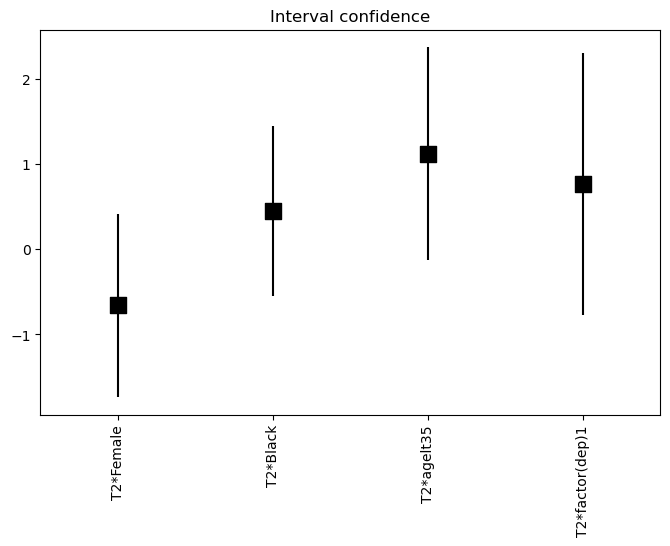

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
concat.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(concat.shape[0]), 
        marker='s', s=120, 
        y=concat['coef'], color='black')
plt.title('Interval confidence')


### Interpretation

- On average, women who undergo treatment tend to have a 65% shorter unemployment duration compared to treated men. However, this difference is not statistically significant.

- On average, Black people receiving treatment generally spend 45% more time unemployed than non-Black individuals in the same treatment group. Nevertheless, this result does not reach statistical significance.

- On average, People older than 35 who are treated typically experience 112% more unemployment weeks compared to those younger than 35 in the treatment group.

- On avergae, Treated individuals with a single dependent are, on average, unemployed 76% longer than those with no dependents or more than one dependent. However, this finding lacks statistical significance.

 ## 3. A Crash Course in Good and Bad Controls 

### Model 1 - Good Control: Common cause between X and Y 

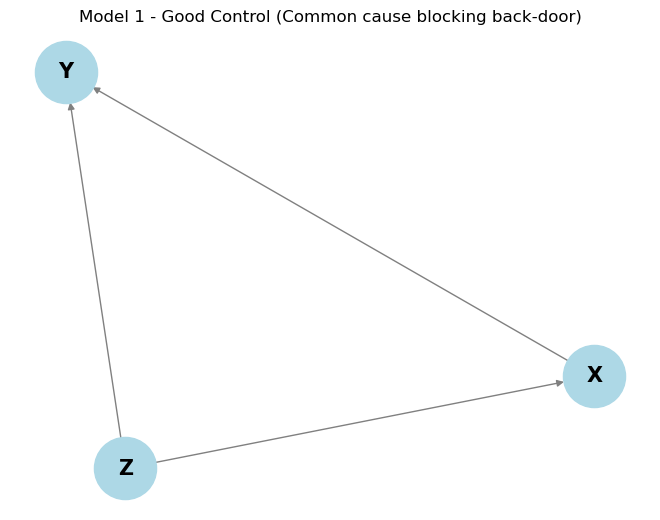

In [37]:
dag1 = nx.DiGraph()
dag1.add_edges_from([("Z", "X"), ("Z", "Y"), ("X", "Y")])
plot_dag(dag1, "Model 1 - Good Control (Common cause blocking back-door)")

In [38]:
# Set seed for reproducibility
np.random.seed(1234567)

# Define sample size
n = 1000

# Generate variables for Model 1
Z1 = np.random.normal(0, 1, n).reshape((n, 1))
X1 = 4*Z1 + np.random.normal(0, 1, n).reshape((n, 1))
Y1 = X1 + 0.8*Z1 + np.random.normal(0, 1, n).reshape((n, 1))

# Create DataFrame for Model 1
data1 = pd.DataFrame(np.hstack([Z1, X1, Y1]), columns=["Z", "X", "Y"])

# Perform regression without Z
model1_without_Z = sm.OLS(data1["Y"], sm.add_constant(data1["X"])).fit()
print("Model 1 without Z:")
print(model1_without_Z.summary())

# Perform regression with Z
model1_with_Z = sm.OLS(data1["Y"], sm.add_constant(data1[["X", "Z"]])).fit()
print("Model 1 with Z:")
print(model1_with_Z.summary())

Model 1 without Z:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 2.099e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:48:37   Log-Likelihood:                -1454.8
No. Observations:                1000   AIC:                             2914.
Df Residuals:                     998   BIC:                             2923.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.033 

### Model 4 - Good Control: Mediator between X and Y with common cause

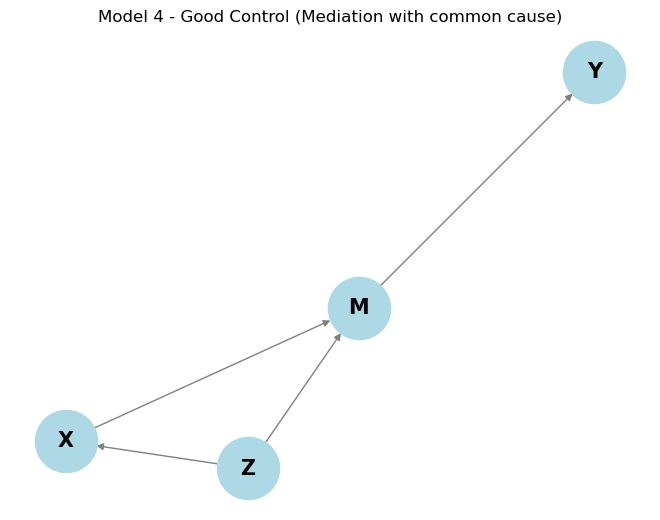

In [39]:
dag4 = nx.DiGraph()
dag4.add_edges_from([("X", "M"), ("M", "Y"), ("Z", "X"), ("Z", "M")])
plot_dag(dag4, "Model 4 - Good Control (Mediation with common cause)")

In [40]:
# Generate variables for Model 4
Z4 = np.random.normal(0, 1, n).reshape((n, 1))
X4 = 2*Z4 + np.random.normal(0, 1, n).reshape((n, 1))
M4 = 4*Z4+ X4 + np.random.normal(0, 1, n).reshape((n, 1))
Y4 = M4 + np.random.normal(0, 1, n).reshape((n, 1))

# Create DataFrame for Model 4
data4 = pd.DataFrame(np.hstack([Z4, X4, Y4, M4]), columns=["Z", "X", "Y","M"])

# Perform regression without Z
model4_without_Z = sm.OLS(data4["Y"], sm.add_constant(data4["X"])).fit()
print("\nModel 4 without Z:")
print(model4_without_Z.summary())

# Perform regression with Z
model4_with_Z = sm.OLS(data4["Y"], sm.add_constant(data4[["X", "Z"]])).fit()
print("\nModel 4 with Z:")
print(model4_with_Z.summary())


Model 4 without Z:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     6707.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:48:38   Log-Likelihood:                -2216.4
No. Observations:                1000   AIC:                             4437.
Df Residuals:                     998   BIC:                             4447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0264      0.070

### Model 7 - Bad Control: Inducing M-bias by controlling a collider

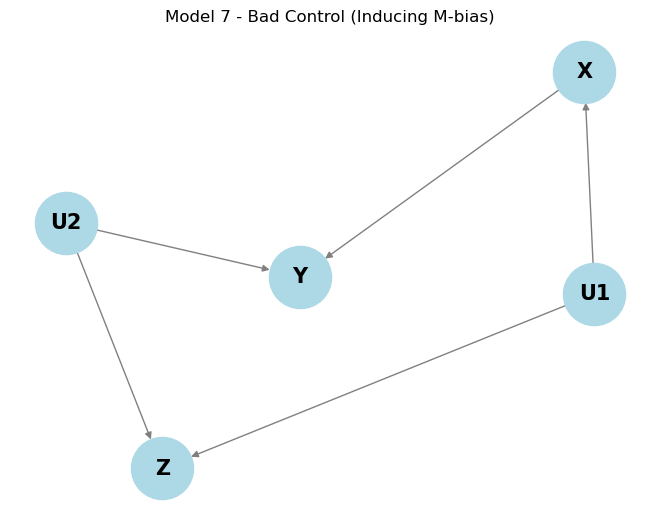

In [41]:
dag7 = nx.DiGraph()
dag7.add_edges_from([("U1", "X"), ("U1", "Z"), ("U2", "Z"), ("U2", "Y"), ("X", "Y")])
plot_dag(dag7, "Model 7 - Bad Control (Inducing M-bias)")

In [42]:
# Generate variables for Model 7
U1 = np.random.normal(0, 1, n).reshape((n, 1))
U2 = np.random.normal(0, 1, n).reshape((n, 1))
Z7 = 0.5*U1 + 0.8*U2 + np.random.normal(0, 1, n).reshape((n, 1))
X7 = 3*U1 + np.random.normal(0, 1, n).reshape((n, 1))
Y7 = 5*X7 + U2 + np.random.normal(0, 1, n).reshape((n, 1))

# Create DataFrame for Model 7
data7 = pd.DataFrame(np.hstack([Z7, X7, Y7]), columns=["Z", "X", "Y"])

# Perform regression without Z
model7_without_Z = sm.OLS(data7["Y"], sm.add_constant(data7["X"])).fit()
print("\nModel 7 without Z:")
print(model7_without_Z.summary())

# Perform regression with Z
model7_with_Z = sm.OLS(data7["Y"], sm.add_constant(data7[["X", "Z"]])).fit()
print("\nModel 7 with Z:")
print(model7_with_Z.summary())


Model 7 without Z:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.111e+05
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:48:38   Log-Likelihood:                -1798.2
No. Observations:                1000   AIC:                             3600.
Df Residuals:                     998   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0672      0.046

### Model 11 - Bad Control: Overcontrol bias by controlling a mediator

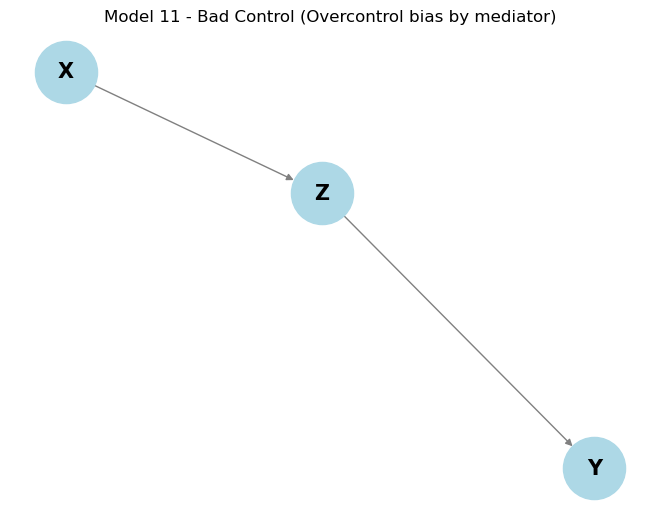

In [43]:
dag11 = nx.DiGraph()
dag11.add_edges_from([("X", "Z"), ("Z", "Y")])
plot_dag(dag11, "Model 11 - Bad Control (Overcontrol bias by mediator)")

In [44]:
# Generate variables for Model 11
X11 = np.random.normal(0, 1, n).reshape((n, 1))
Z11 = 4*X11 + np.random.normal(0, 1, n).reshape((n, 1))
Y11 = Z11 + np.random.normal(0, 1, n).reshape((n, 1))

# Create DataFrame for Model 11
data11 = pd.DataFrame(np.hstack([Z11, X11, Y11]), columns=["Z", "X", "Y"])

# Perform regression without Z
model11_without_Z = sm.OLS(data11["Y"], sm.add_constant(data11["X"])).fit()
print("\nModel 11 without Z:")
print(model11_without_Z.summary())

# Perform regression with Z
model11_with_Z = sm.OLS(data11["Y"], sm.add_constant(data11[["X", "Z"]])).fit()
print("\nModel 11 with Z:")
print(model11_with_Z.summary())




Model 11 without Z:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     8257.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:48:38   Log-Likelihood:                -1730.3
No. Observations:                1000   AIC:                             3465.
Df Residuals:                     998   BIC:                             3474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0083      0.04

### Model 14 - Neural Control

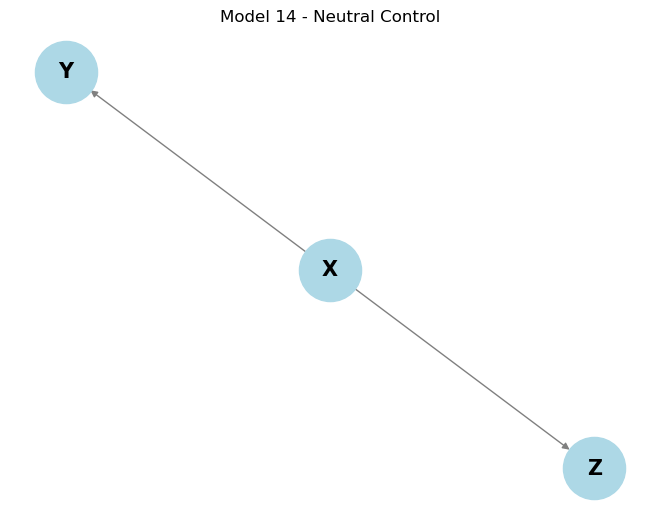

In [45]:
dag14 = nx.DiGraph()
dag14.add_edges_from([("X", "Y"), ("X", "Z")])
plot_dag(dag14, "Model 14 - Neutral Control")

In [46]:
# Generate variables for Model 14
X14 = np.random.normal(0, 1, n).reshape((n, 1))
Z14 = 3*X14 + np.random.normal(0, 1, n).reshape((n, 1))
Y14 = 8*X14 + np.random.normal(0, 1, n).reshape((n, 1))

# Create DataFrame for Model 14
data14 = pd.DataFrame(np.hstack([Z14, X14, Y14]), columns=["Z", "X", "Y"])

# Perform regression without Z
model14_without_Z = sm.OLS(data14["Y"], sm.add_constant(data14["X"])).fit()
print("\nModel 14 without Z:")
print(model14_without_Z.summary())

# Perform regression with Z
model14_with_Z = sm.OLS(data14["Y"], sm.add_constant(data14[["X", "Z"]])).fit()
print("\nModel 14 with Z:")
print(model14_with_Z.summary())


Model 14 without Z:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 6.145e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:48:39   Log-Likelihood:                -1439.6
No. Observations:                1000   AIC:                             2883.
Df Residuals:                     998   BIC:                             2893.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0134      0.03

### Real-World Examples for Each Model
Here are examples for each model based on real data scenarios:

- **Model 1 (Good Control - Common Cause):** In health studies, controlling for socioeconomic status $Z$ while examining the impact of physical activity $X$ on health outcomes $Y$ can be beneficial, as socioeconomic status can be a common cause affecting both physical activity and health.

- **Model 4 (Good Control - Blocking Back-Door Paths through a Mediator):** In education, controlling for school resources $Z$ in a study of teaching quality $X4$ and student performance $Y$ helps to block back-door paths through intermediaries, providing a more accurate estimate of the effect of teaching quality.

- **Model 7 (Bad Control - M-Bias):** In crime studies, controlling for neighborhood policing $Z$ in examining the relationship between social programs $X$ and crime rates $Y$ can induce bias through a previously unbiased path, because neighborhood policing could be a pre-treatment variable that opens back-door paths.

- **Model 11 (Bad Control - Overcontrol Bias):** In health, controlling for medication adherence $Z$ when evaluating the effect of a treatment $X$ on health outcomes $Y$ can lead to overcontrol bias, as medication adherence might be a mediator through which the treatment affects health outcomes.

- **Model 14 (Neutral Control - Possibly Helpful for Selection Bias):** In sociological studies, controlling for marital status $Z$ while assessing the impact of job training programs $X$ on employment rates $Y$ may not introduce bias and can sometimes be useful to manage selection bias in data collection.
